In [ ]:
#使用sklearn的API实现线性回归
import numpy as np
import pandas as pd  #数据准备
import matplotlib.pyplot as plt

data = pd.read_csv('Salary_Data.csv')
print(data.head())

<function matplotlib.pyplot.show(close=None, block=None)>

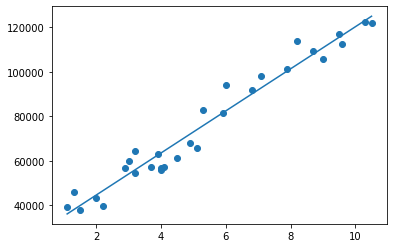

In [3]:
#整理输入和输出数据
x = data.iloc[:, :-1]  #要所有行，不要最后一列,这样就能切出来二维的x了
y = data.iloc[:, -1]

import sklearn.linear_model as lm  #线性模型

model = lm.LinearRegression()
model.fit(x, y)
pred_y = model.predict(x)

plt.plot(x, pred_y)
plt.scatter(data['YearsExperience'], data['Salary'])
plt.show

In [4]:
import pickle

In [5]:
with open('linearRegression.pickle', 'wb') as f:  #因为保存的是模型，所以必须是二进制写
    pickle.dump(model, f)
    print("保存模型完成.")

保存模型完成.


In [6]:
#模型加载
with open('linearRegression.pickle', 'rb') as f:
    new_model = pickle.load(f)
    print("加载模型完成.")

加载模型完成.


In [7]:
res = new_model.predict([[1.1], [2.2]])

/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
res

array([36187.15875227, 46582.11730587])

In [31]:
#封装预测逻辑，构建薪资预测类
import pickle


class SalaryPredictModel():

    def __init__(self):
        self.model = pickle.load(open('linearRegression.pickle', 'rb'))

    def predict_mysel(self, exps):
        quest = []
        for i in exps:
            temp = []
            temp.append(i)
            quest.append(temp)
        res = self.model.predict(quest)
        return res

    def predict_mysel2(self, exps):
        quest = np.array(exps).reshape(len(exps), 1)
        res = self.model.predict(quest)
        return res

    def predict_mysel3(self, exps):
        quest = np.array(exps).reshape(1, -1)
        res = self.model.predict(quest)
        return res

In [32]:
model = SalaryPredictModel()
res = model.predict_mysel2([1.1, 2.2, 3.3])
res

/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36187.15875227, 46582.11730587, 56977.07585947])

In [20]:
test = np.array([1.1, 2.2, 3.3])
test

array([1.1, 2.2, 3.3])

In [22]:
test.shape

(3,)

In [24]:
t = test.reshape(1, -1)

In [26]:
t.shape

(1, 3)

In [27]:
t2 = test.reshape(-1, 1)

In [28]:
t2.shape

(3, 1)

In [40]:
import sklearn.linear_model as lm
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('Salary_Data2.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [37]:
#整理输入输出数据
x = data.iloc[:, :-1]  #切出来二维数据
y = data.iloc[:, -1]

In [39]:
model = lm.Ridge(alpha=100)
model.fit(x, y)
pred_y = model.predict(x)

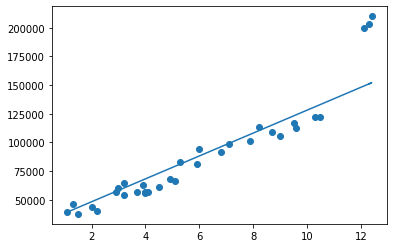

In [42]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.plot(data['YearsExperience'], pred_y)
plt.show()

In [46]:
model2 = lm.LinearRegression()
model2.fit(x, y)
pred_y2 = model2.predict(x)

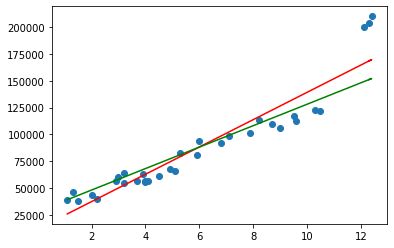

In [52]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.plot(data['YearsExperience'], pred_y2, color='red')
plt.plot(data['YearsExperience'], pred_y, color='green')
plt.show()

In [53]:
test_x = x.iloc[:30:4]
test_y = y[:30:4]

In [54]:
import sklearn.metrics as sm

In [57]:
params = np.arange(50, 151, 10)
for p in params:
    model = lm.Ridge(alpha=p)
    model.fit(x, y)
    pred_test_y = model.predict(test_x)
    print('参数：{}得分:{}'.format(p, sm.r2_score(test_y, pred_test_y)))


参数：50得分:0.9017658166236252
参数：60得分:0.9079377012464043
参数：70得分:0.9123556127607111
参数：80得分:0.9152344834900279
参数：90得分:0.9167620543385843
参数：100得分:0.9171026697534422
参数：110得分:0.9164004858087551
参数：120得分:0.9147821912848049
参数：130得分:0.9123593230759179
参数：140得分:0.9092302424447939
参数：150得分:0.9054818267439974


In [63]:
import sklearn.preprocessing as sp
import sklearn.pipeline as pl

In [61]:
#多项式回归
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [64]:
#整理输入输出数据
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [65]:
model = pl.make_pipeline(sp.PolynomialFeatures(3), lm.LinearRegression())
model.fit(x, y)
pred_y = model.predict(x)

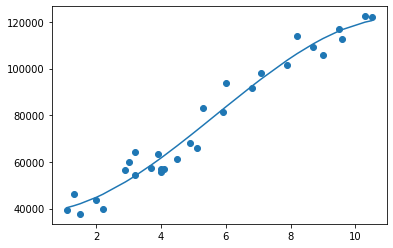

In [66]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.plot(data['YearsExperience'], pred_y)
plt.show()

In [67]:
#####################################################################################

In [78]:
import sklearn.datasets as sd
import sklearn.utils as su

# 加载波士顿地区房价数据集
boston = sd.load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datas

In [80]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [81]:
boston.filename

'boston_house_prices.csv'

In [83]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [84]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [87]:
print(boston.data.shape)

(506, 13)


In [89]:
print(boston.target.shape)

(506,)


In [90]:
#整理输入和输出

In [91]:
x = boston.data
y = boston.target

In [92]:
import sklearn.model_selection as ms  #模型选择模块

In [172]:
#切分数据
data = ms.train_test_split(x, y, test_size=0.2, random_state=7)


In [104]:
data[0].shape

(404, 13)

In [105]:
data[1].shape

(102, 13)

In [106]:
data[2].shape

(404,)

In [107]:
data[3].shape

(102,)

In [116]:
train_x, test_x, train_y, test_y = data

In [114]:
# 开始训练和评估模型
import sklearn.linear_model as lm  # 线性模型# 线性模型
import sklearn.metrics as sm  # 模型性能评价模块
import sklearn.metrics as sm  # 模型性能评价模块 ,这种误差的计算都是从后向前去的

In [117]:
# 创建线性回归器
model = lm.LinearRegression()
# 用已知输入、输出数据集训练回归器
model.fit(train_x, train_y)
# 根据训练模型预测输出
pred_y = model.predict(test_x)

In [119]:
#平均绝对误差
print(sm.mean_absolute_error(test_y, pred_y))
#平均平方误差
print(sm.mean_squared_error(test_y, pred_y))
#中位数绝对误差
print(sm.median_absolute_error(test_y, pred_y))
#R2是评价模型的，前面是评价数值的
print(sm.r2_score(test_y, pred_y))

3.7807629091749586
34.0564813488746
2.8155062334508365
0.578541547276341


In [ ]:
model_2 = lm.Ridge(alpha=200, max_iter=1000)  # alpha就是惩罚项系数，创建对象, max_iter为最大迭代次数
model_2.fit(train_x, train_y)  # 训练
pred_y2 = model_2.predict(test_x)  # 预测

# lasso回归
model_3 = lm.Lasso(alpha=0.5,  # L1范数相乘的系数
                   max_iter=1000)  # 最大迭代次数
model_3.fit(train_x, train_y)  # 训练
pred_y3 = model_3.predict(test_y)  # 预测

In [151]:
params = np.arange(50, 501, 50)
Lasso_core = 0
Ridge_core = 0
for p in params:
    """
    model = lm.Ridge(alpha=p)
    model.fit(x, y)
    pred_test_y = model.predict(test_x)
    print('参数：{}得分:{}'.format(p, sm.r2_score(test_y, pred_test_y)))
    """

    model_2 = lm.Ridge(alpha=p, max_iter=1000)  # alpha就是惩罚项系数，创建对象, max_iter为最大迭代次数
    model_2.fit(train_x, train_y)  # 训练
    pred_y2 = model_2.predict(test_x)  # 预测
    temp_ridge_core = sm.r2_score(test_y, pred_y2)
    if temp_ridge_core > Ridge_core:
        print('参数：{}得分:{}'.format(p, sm.r2_score(test_y, pred_y2)))
        Ridge_core = temp_ridge_core

参数：50得分:0.6284277390131747
参数：100得分:0.6534834314895364
参数：150得分:0.663934677310996
参数：200得分:0.6685689801755516
参数：250得分:0.670448478030762
参数：300得分:0.6708711876493496


In [125]:
for p in params:
    # lasso回归
    model_3 = lm.Lasso(alpha=p,  # L1范数相乘的系数
                       max_iter=1000)  # 最大迭代次数
    model_3.fit(train_x, train_y)  # 训练
    pred_y3 = model_3.predict(test_x)  # 预测
    temp_lasso_core = sm.r2_score(test_y, pred_y2)
    if temp_lasso_core > Lasso_core:
        print('参数：{}得分:{}'.format(p, sm.r2_score(test_y, pred_y3)))
        Lasso_core = temp_lasso_core

参数：50得分:0.16066845162023402


In [126]:
import sklearn.pipeline as pl
import sklearn.preprocessing as sp

In [152]:
model = pl.make_pipeline(sp.PolynomialFeatures(2),  # 多项式特征扩展，扩展最高次项为3,这里是构成一个管道，先扩展特征，然后构建线性模型，管道可以把上一步的输出变成下一步的输入
                         lm.LinearRegression())

# 用已知输入、输出数据集训练回归器
model.fit(train_x, train_y)
# print(model[1].coef_)
# print(model[1].intercept_)

# 根据训练模型预测输出
pred_train_y = model.predict(test_x)

In [153]:
#平均绝对误差
print(sm.mean_absolute_error(test_y, pred_train_y))
#平均平方误差
print(sm.mean_squared_error(test_y, pred_train_y))
#中位数绝对误差
print(sm.median_absolute_error(test_y, pred_train_y))
#R2是评价模型的，前面是评价数值的
print(sm.r2_score(test_y, pred_train_y))

3.278957325950557
30.948647739773413
1.8523992121219628
0.6170018547519298


In [155]:
import sklearn.tree as st

In [162]:
#老师方法
def get_model(name, model):
    print('----------------', name, '-------------')
    model.fit(train_x, train_y)
    pred_train_y = model.predict(train_x)
    pred_test_y = model.predict(test_x)
    print(name, ':训练集得分:', sm.r2_score(train_y, pred_train_y))
    print(name, ':测试集得分:', sm.r2_score(test_y, pred_test_y))


model_dict = {'线性回归': lm.LinearRegression(),
              '岭回归': lm.Ridge(alpha=300),
              '多项式回归': pl.make_pipeline(sp.PolynomialFeatures(2),
                                        lm.LinearRegression()),
              '单颗决策树': st.DecisionTreeRegressor(max_depth=6),
              }

for name, obj in model_dict.items():
    get_model(name, obj)

---------------- 线性回归 -------------
线性回归 :训练集得分: 0.7698532963729757
线性回归 :测试集得分: 0.578541547276341
---------------- 岭回归 -------------
岭回归 :训练集得分: 0.7051509153484576
岭回归 :测试集得分: 0.6708711876493496
---------------- 多项式回归 -------------
多项式回归 :训练集得分: 0.9336239312914594
多项式回归 :测试集得分: 0.6170018547519298
---------------- 单颗决策树 -------------
单颗决策树 :训练集得分: 0.9466499293522961
单颗决策树 :测试集得分: 0.6927938707026335


In [164]:
#单颗决策树是弱模型,
#提升后为 Adaboost回归
import sklearn.ensemble as se

In [169]:
model = st.DecisionTreeRegressor(max_depth=6)
model = se.AdaBoostRegressor(model, n_estimators=400)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('训练集得分:', sm.r2_score(train_y, pred_train_y))
print('测试集得分:', sm.r2_score(test_y, pred_test_y))

训练集得分: 0.982683950261485
测试集得分: 0.8394539302165233


In [174]:
#将成数据用于训练，1成用于测试，效果会大大提升
fi = model.feature_importances_
print(fi)

[0.0363965  0.00157867 0.01162072 0.00092482 0.03127858 0.26471983
 0.02561131 0.09947727 0.01309537 0.03044425 0.02199731 0.01746424
 0.44539114]


In [175]:
fi = pd.Series(fi, index=boston.feature_names)

In [176]:
fi

CRIM       0.036397
ZN         0.001579
INDUS      0.011621
CHAS       0.000925
NOX        0.031279
RM         0.264720
AGE        0.025611
DIS        0.099477
RAD        0.013095
TAX        0.030444
PTRATIO    0.021997
B          0.017464
LSTAT      0.445391
dtype: float64

<AxesSubplot:>

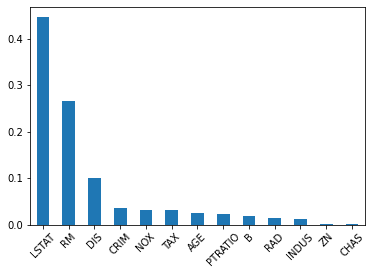

In [200]:
fi.sort_values(ascending=False).plot.bar(rot=45)

In [ ]:
#GBDT

In [203]:
model = se.GradientBoostingRegressor(max_depth=6, n_estimators=400, min_samples_split=2)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('训练集得分:', sm.r2_score(train_y, pred_train_y))
print('测试集得分:', sm.r2_score(test_y, pred_test_y))

训练集得分: 0.9999999336974874
测试集得分: 0.8217257197546832


In [ ]:
#切分9成训练集得分会更高